## Apply the DBSCAN clustering algorithm to a dataset with non-globular clusters, compare its performance with k-means, and visualise the differences in clustering behaviour.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

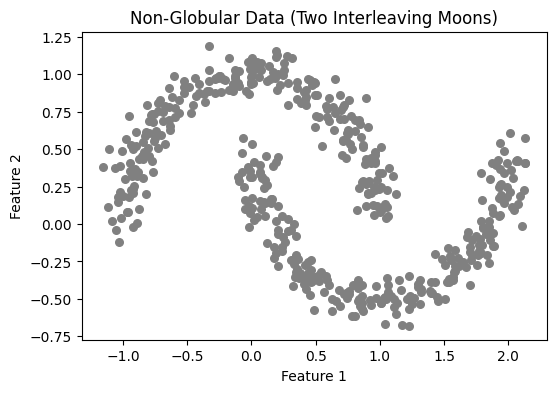

In [3]:
#  Generate non-globular dataset
X, y_true = make_moons(n_samples=500, noise=0.08, random_state=42)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], s=30, c='gray')
plt.title("Non-Globular Data (Two Interleaving Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Scale the features (important for DBSCAN distance calculations)
X_scaled = StandardScaler().fit_transform(X)

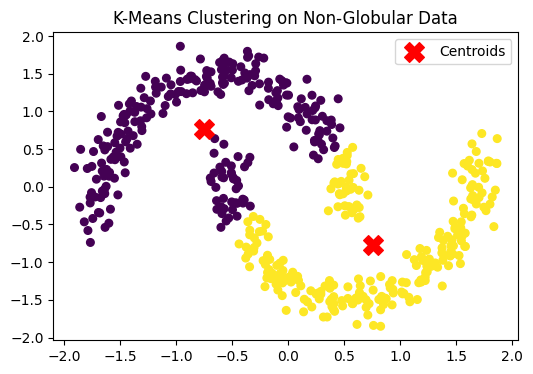

✅ Silhouette Score (K-Means): 0.493


In [4]:
# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering on Non-Globular Data")
plt.legend()
plt.show()

# silhouette score
sil_kmeans = silhouette_score(X_scaled, y_kmeans)
print(f"✅ Silhouette Score (K-Means): {sil_kmeans:.3f}")

Apply DBSCAN

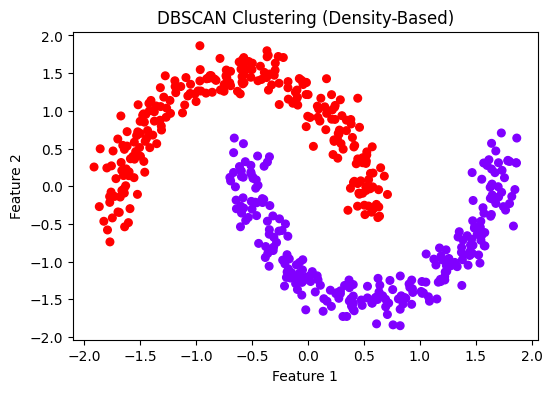

In [6]:
# eps → neighborhood radius, min_samples → min points to form a dense region
dbscan = DBSCAN(eps=0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_dbscan, cmap='rainbow', s=30)
plt.title("DBSCAN Clustering (Density-Based)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [7]:
# DBSCAN labels -1 as noise
unique_labels = np.unique(y_dbscan)
print("Cluster labels found by DBSCAN:", unique_labels)

Cluster labels found by DBSCAN: [0 1]


In [8]:
# Compute silhouette only if more than 1 cluster found
if len(np.unique(y_dbscan)) > 1:
    sil_dbscan = silhouette_score(X_scaled, y_dbscan)
    print(f"✅ Silhouette Score (DBSCAN): {sil_dbscan:.3f}")
else:
    sil_dbscan = np.nan
    print("⚠️ DBSCAN found only one cluster — Silhouette not applicable.")

✅ Silhouette Score (DBSCAN): 0.384


/tmp/ipython-input-1372995032.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Silhouette Score', data=results, palette='coolwarm')


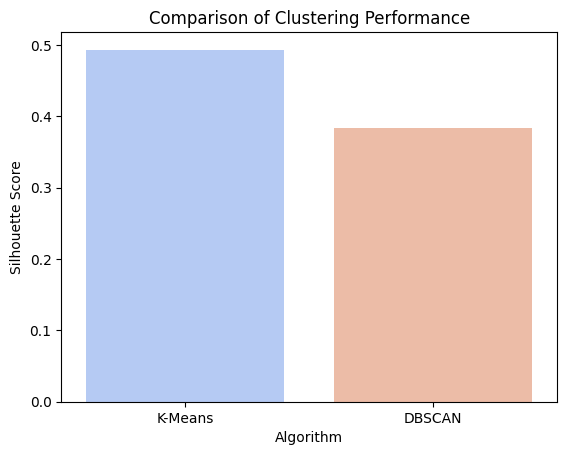

In [9]:
# Compare visually and numerically
import pandas as pd
results = pd.DataFrame({
    'Algorithm': ['K-Means', 'DBSCAN'],
    'Silhouette Score': [sil_kmeans, sil_dbscan]
})

sns.barplot(x='Algorithm', y='Silhouette Score', data=results, palette='coolwarm')
plt.title("Comparison of Clustering Performance")
plt.show()